## Model finalization

### Shampoo Sales Dataset

This dataset describes the monthly number of sales of shampoo over a 3 year period.
The units are a sales count and there are 36 observations. The original dataset is credited to Makridakis, Wheelwright and Hyndman (1998).

The entire dataset is taken from Data Market.

https://datamarket.com/data/set/22r0/sales-of-shampoo-over-a-three-year-period

### Example 5

* Split the data into train and test. 
* Build different time series models on train data set and test it on test data set
* Compare models performance.


In [1]:
import pandas            as     pd 
import numpy             as     np 
from   sklearn.metrics   import mean_squared_error
from   math              import sqrt
import matplotlib.pyplot as     plt 
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
def MAPE(y, yhat): 
    y, yhat = np.array(y), np.array(yhat)
    try:
        mape =  round(np.sum(np.abs(yhat - y)) / np.sum(y) * 100,2)
    except:
        print("Observed values are empty")
        mape = np.nan
    return mape

       Month  Sales
0 1901-01-01  266.0
1 1901-02-01  145.9
2 1901-03-01  183.1
3 1901-04-01  119.3
4 1901-05-01  180.3


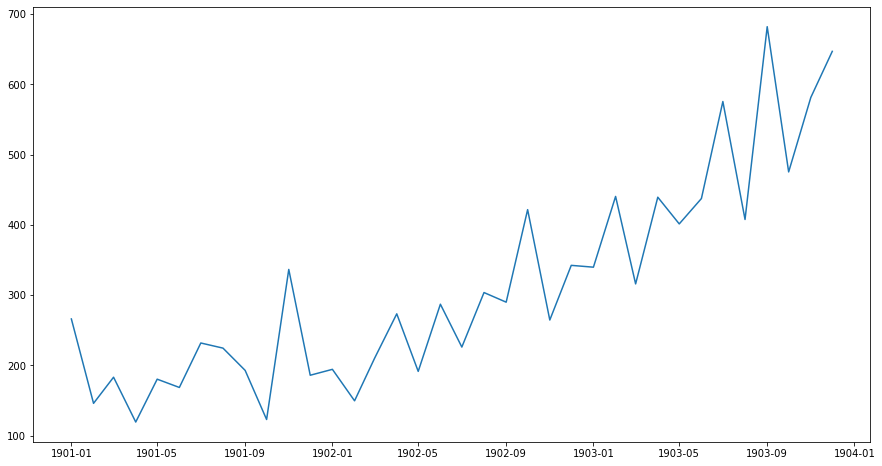

In [3]:
#Importing data
def parser(x):
    return pd.datetime.strptime('190'+x, '%Y-%m')
 
df = pd.read_csv('D:/shampoo-sales.csv', header=0, parse_dates=[0], squeeze=True, date_parser=parser)

print(df.head())
plt.figure(figsize=(15,8))
plt.plot(df['Month'],df['Sales']);


In [4]:
df.Timestamp = pd.to_datetime(df.Month, format='%Y-%m') 
df.index     = df.Timestamp 

### Creating train and test set 

In [5]:
train    =   df[0:int(len(df)*0.7)] 
test     =   df[int(len(df)*0.7):]

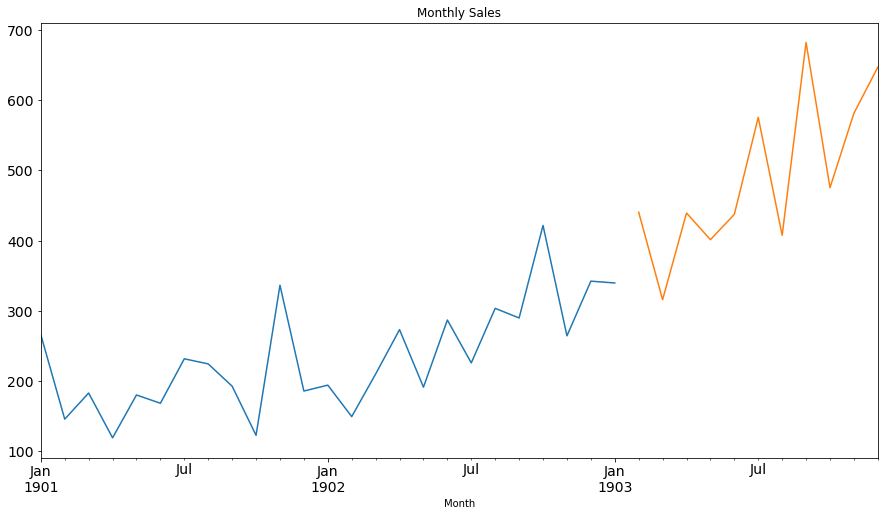

In [6]:
### Plot data

train['Sales'].plot(figsize=(15,8), title= 'Monthly Sales', fontsize=14)
test['Sales'].plot(figsize=(15,8), title= 'Monthly Sales', fontsize=14)

In [7]:
df.head()

,Month,Sales
Month,,
1901-01-01,1901-01-01,266.0
1901-02-01,1901-02-01,145.9
1901-03-01,1901-03-01,183.1
1901-04-01,1901-04-01,119.3
1901-05-01,1901-05-01,180.3


### Method  1: Regression on Time

In [8]:
df1         =   df.copy() # Make a copy

time        = [i+1 for i in range(len(df))]
df1['time'] = time
monthDf     = df1[['Month']]

df1.drop('Month', axis=1, inplace=True)
df1.head(2)

,Sales,time
Month,,
1901-01-01,266.0,1
1901-02-01,145.9,2


In [9]:
#Creating train and test set 
train=df1[0:int(len(df1)*0.7)] 
test=df1[int(len(df1)*0.7):]

In [10]:
x_train = train.drop('Sales', axis=1)
x_test  = test.drop('Sales', axis=1)
y_train = train[['Sales']]
y_test  = test[['Sales']]

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
model = LinearRegression()

In [13]:
model.fit(x_train, y_train)

LinearRegression()

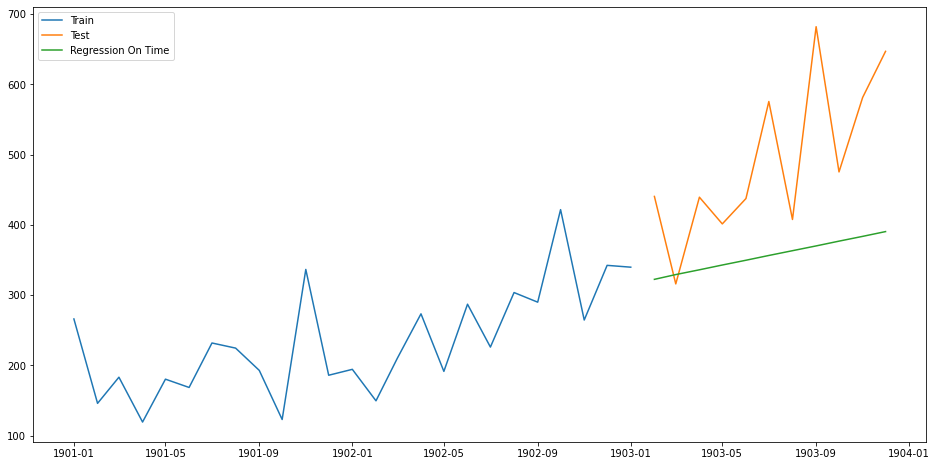

In [14]:
predictions         = model.predict(x_test)
y_test['RegOnTime'] = predictions

plt.figure(figsize=(16,8))
plt.plot( train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_test['RegOnTime'], label='Regression On Time')
plt.legend(loc='best')

In [15]:
rmse = sqrt(mean_squared_error(test.Sales, y_test.RegOnTime))
rmse = round(rmse, 3)
mape = MAPE(test.Sales, y_test.RegOnTime)
print("For RegressionOnTime,  RMSE is %3.3f MAPE is %3.2f" %(rmse, mape))

For RegressionOnTime,  RMSE is 164.563 MAPE is 27.94


In [16]:
resultsDf = pd.DataFrame({'Method':['RegressionOnTime'], 'rmse': [rmse], 'mape' : [mape]})
resultsDf

,Method,rmse,mape
0,RegressionOnTime,164.563,27.94


### Method 2: Regression on Time With Seasonal Components

In [17]:
time = [i+1 for i in range(len(df))]
df1 = df.copy()
df1['time'] = time
print(df1.head())
print(df1.shape[0])
monthSeasonality = ['m1', 'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12']#defining the 12 
#months

                Month  Sales  time
Month                             
1901-01-01 1901-01-01  266.0     1
1901-02-01 1901-02-01  145.9     2
1901-03-01 1901-03-01  183.1     3
1901-04-01 1901-04-01  119.3     4
1901-05-01 1901-05-01  180.3     5
36


In [18]:
df1['monthSeasonality'] = monthSeasonality * 3# it is multiplied by 3 as there are 36 observations
df1.head()

,Month,Sales,time,monthSeasonality
Month,,,,
1901-01-01,1901-01-01,266.0,1,m1
1901-02-01,1901-02-01,145.9,2,m2
1901-03-01,1901-03-01,183.1,3,m3
1901-04-01,1901-04-01,119.3,4,m4
1901-05-01,1901-05-01,180.3,5,m5


In [19]:
monthDf = df1[['Month']]
df1.drop('Month', axis=1, inplace=True)

In [20]:
df1Complete = pd.get_dummies(df1, drop_first=True)
df1Complete.head(2).T

Month,1901-01-01,1901-02-01
Sales,266.0,145.9
time,1.0,2.0
monthSeasonality_m10,0.0,0.0
monthSeasonality_m11,0.0,0.0
monthSeasonality_m12,0.0,0.0
monthSeasonality_m2,0.0,1.0
monthSeasonality_m3,0.0,0.0
monthSeasonality_m4,0.0,0.0
monthSeasonality_m5,0.0,0.0
monthSeasonality_m6,0.0,0.0


In [21]:
#Creating train and test set 
train=df1Complete[0:int(len(df1Complete)*0.7)] 
test=df1Complete[int(len(df1Complete)*0.7):]

In [22]:
x_train  = train.drop('Sales', axis=1)
x_test   = test.drop('Sales', axis=1)
y_train  = train[['Sales']]
y_test   = test[['Sales']]

In [23]:
model    = LinearRegression()

In [24]:
model.fit(x_train, y_train)

LinearRegression()

In [25]:
predictions = model.predict(x_test)

In [26]:
y_test['RegOnTimeSeasonal'] = predictions

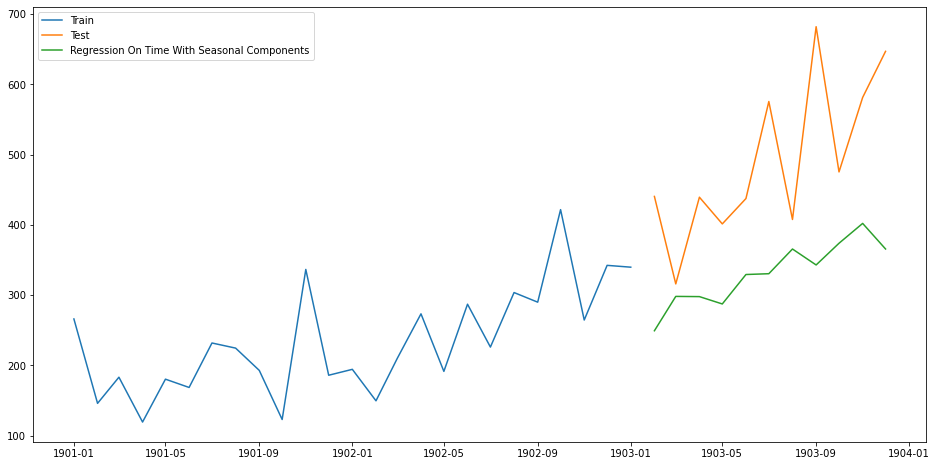

In [27]:
plt.figure(figsize=(16,8))
plt.plot( train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_test['RegOnTimeSeasonal'], label='Regression On Time With Seasonal Components')
plt.legend(loc='best')

In [28]:
rmse = sqrt(mean_squared_error(test.Sales, y_test.RegOnTimeSeasonal))
rmse = round(rmse, 3)
mape = MAPE(test.Sales, y_test.RegOnTimeSeasonal)
print("For RegOnTimeSeasonal,  RMSE is %3.3f MAPE is %3.2f" %(rmse, mape))

For RegOnTimeSeasonal,  RMSE is 185.864 MAPE is 32.59


In [29]:
tempResultsDf = pd.DataFrame({'Method':['RegressionOnTimeSeasonal'], 'rmse': [rmse], 'mape' : [mape]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf

,Method,rmse,mape
0,RegressionOnTime,164.563,27.94
0,RegressionOnTimeSeasonal,185.864,32.59


### Method 3: Naive Approach: $\hat{y}_{t+1} = y_t$


In [30]:
dd= np.asarray(train.Sales)

In [31]:
y_hat = test.copy()

In [32]:
y_hat['naive'] = dd[len(dd)-1]

Text(0.5, 1.0, 'Naive Forecast')

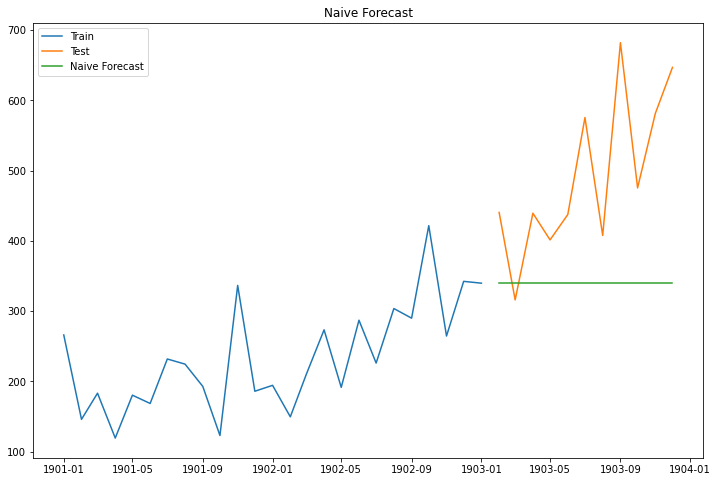

In [33]:
plt.figure(figsize=(12,8))
plt.plot(train.index, train['Sales'], label='Train')
plt.plot(test.index,test['Sales'], label='Test')
plt.plot(y_hat.index,y_hat['naive'], label='Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Forecast")

In [34]:
rmse = sqrt(mean_squared_error(test.Sales, y_hat.naive))
rmse = round(rmse, 3)
mape = MAPE(test.Sales, y_hat.naive)
print("For Naive model,  RMSE is %3.3f MAPE is %3.2f" %(rmse, mape))

For Naive model,  RMSE is 186.469 MAPE is 31.72


In [35]:
tempResultsDf = pd.DataFrame({'Method':['Naive model'], 'rmse': [rmse], 'mape' : [mape]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf

,Method,rmse,mape
0,RegressionOnTime,164.563,27.94
0,RegressionOnTimeSeasonal,185.864,32.59
0,Naive model,186.469,31.72


We can infer from the RMSE and MAPE values and the graphs above, that Naive method and Regression on Time With Seasonal Components model are not suited for datasets with high variability. 

Naive method is best suited for stable datasets. We can still improve our score by adopting different techniques. 

Now we will look at another technique and try to improve our score.

### Method 4: Simple Average

In [36]:
y_hat_avg = test.copy()

In [37]:
y_hat_avg['avg_forecast'] = train['Sales'].mean()

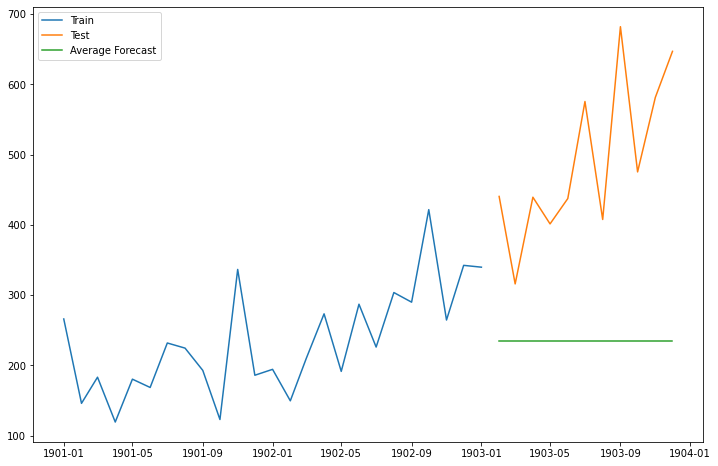

In [38]:
plt.figure(figsize=(12,8))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Average Forecast')
plt.legend(loc='best')

In [39]:
rmse = sqrt(mean_squared_error(test.Sales, y_hat_avg.avg_forecast))
rmse = round(rmse, 3)
mape = MAPE(test.Sales, y_hat_avg.avg_forecast)
print("For Simple Average model,  RMSE is %3.3f MAPE is %3.2f" %(rmse, mape))

For Simple Average model,  RMSE is 279.196 MAPE is 52.35


In [40]:
tempResultsDf = pd.DataFrame({'Method':['Simple Average'], 'rmse': [rmse], 'mape' : [mape]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf

,Method,rmse,mape
0,RegressionOnTime,164.563,27.94
0,RegressionOnTimeSeasonal,185.864,32.59
0,Naive model,186.469,31.72
0,Simple Average,279.196,52.35


### Inference

We can see that this model didn’t improve our score. Hence we can infer from the score that this method works best when the average at each time period remains constant. Though the score of Naive method is better than Average method, but this does not mean that the Naive method is better than Average method on all datasets. We should move step by step to each model and confirm whether it improves our model or not.

## Method 5: Moving Average(MA)

In [41]:
df1 = df.copy()

In [42]:
df1['moving_avg_forecast_4']  = df['Sales'].rolling(4).mean()
df1['moving_avg_forecast_6']  = df['Sales'].rolling(6).mean()
df1['moving_avg_forecast_8']  = df['Sales'].rolling(8).mean()
df1['moving_avg_forecast_12'] = df['Sales'].rolling(12).mean()

For Simple Average model, moving_avg_forecast_4  RMSE is 75.514 MAPE is 13.05
For Simple Average model, moving_avg_forecast_6  RMSE is 88.576 MAPE is 14.62
For Simple Average model, moving_avg_forecast_8  RMSE is 105.158 MAPE is 17.03
For Simple Average model, moving_avg_forecast_12  RMSE is 134.071 MAPE is 22.79


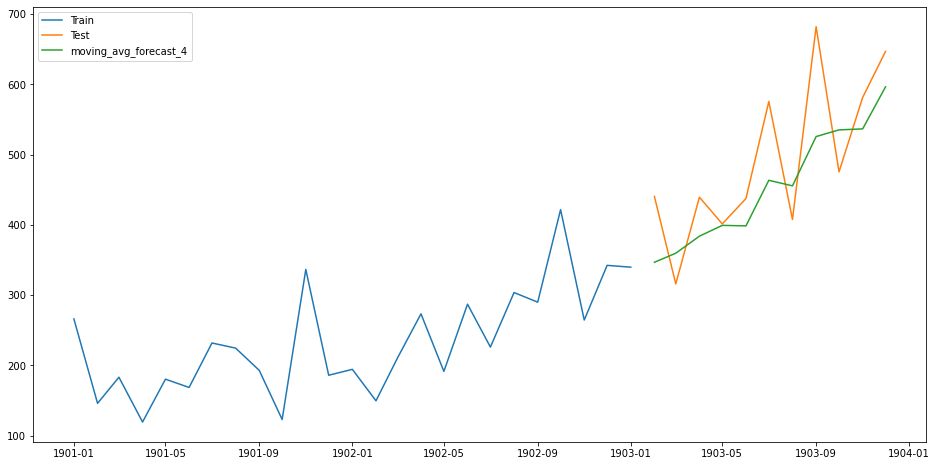

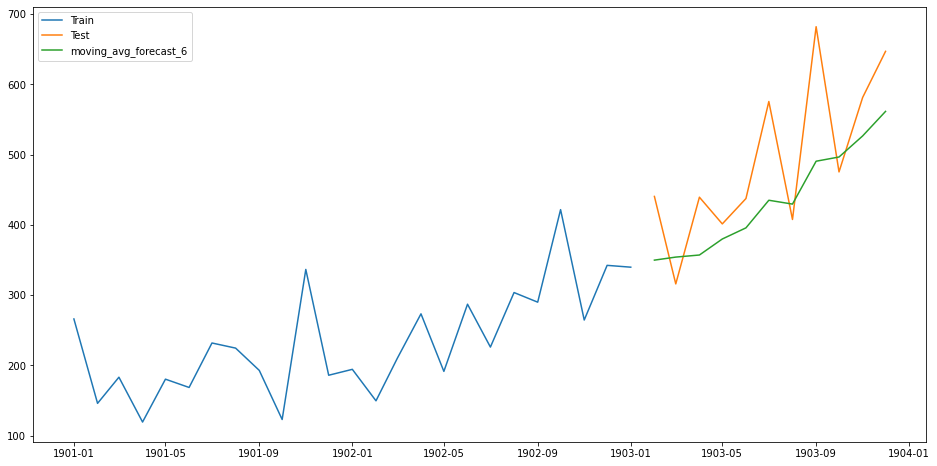

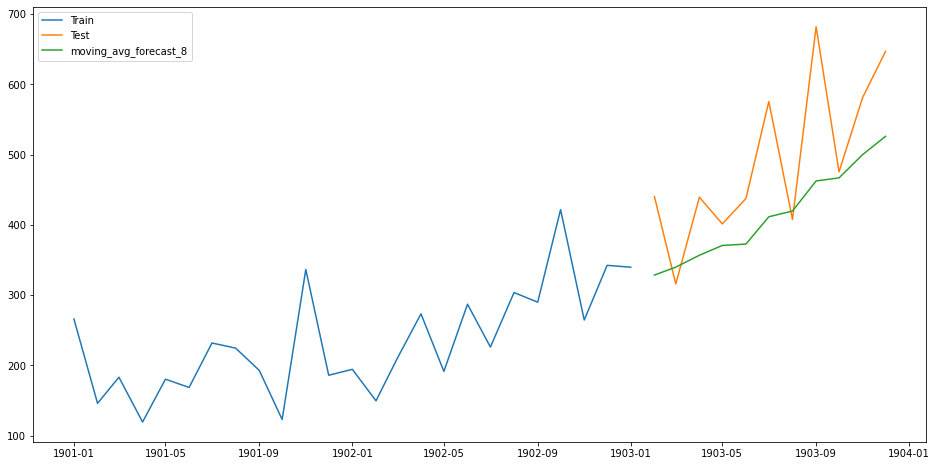

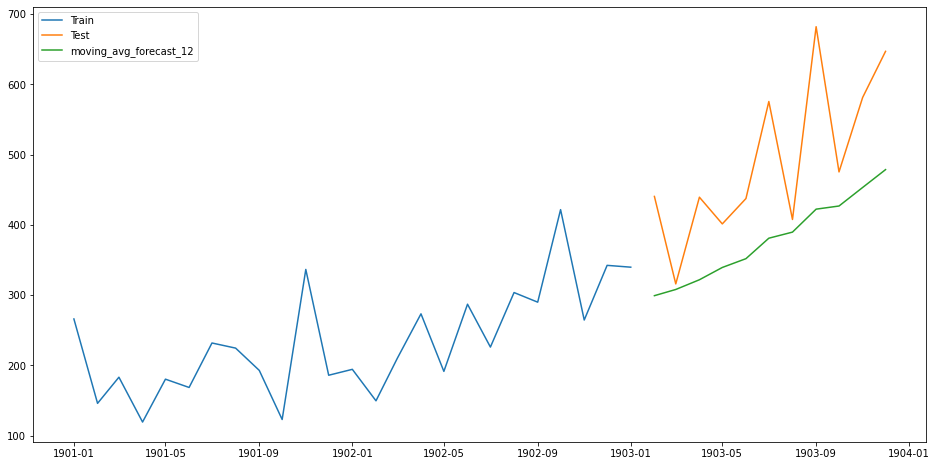

In [43]:
cols = ['moving_avg_forecast_4','moving_avg_forecast_6','moving_avg_forecast_8','moving_avg_forecast_12']

#Creating train and test set 
train=df1[0:int(len(df1)*0.7)] 
test=df1[int(len(df1)*0.7):]

y_hat_avg = test.copy()

for col_name in cols:
    
    plt.figure(figsize=(16,8))
    plt.plot(train['Sales'], label='Train')
    plt.plot(test['Sales'], label='Test')
    plt.plot(y_hat_avg[col_name], label = col_name)
    plt.legend(loc = 'best')

    rmse = sqrt(mean_squared_error(test.Sales, y_hat_avg[col_name]))
    rmse = round(rmse, 3)
    mape = MAPE(test.Sales, y_hat_avg[col_name])
    print("For Simple Average model, %s  RMSE is %3.3f MAPE is %3.2f" %(col_name, rmse, mape))
    
    #Defining the data frame with the model evaluation parameters

    tempResultsDf = pd.DataFrame({'Method':[col_name], 'rmse': [rmse], 'mape' : [mape]})
    resultsDf = pd.concat([resultsDf, tempResultsDf])

In [44]:
print(resultsDf)

                     Method     rmse   mape
0          RegressionOnTime  164.563  27.94
0  RegressionOnTimeSeasonal  185.864  32.59
0               Naive model  186.469  31.72
0            Simple Average  279.196  52.35
0     moving_avg_forecast_4   75.514  13.05
0     moving_avg_forecast_6   88.576  14.62
0     moving_avg_forecast_8  105.158  17.03
0    moving_avg_forecast_12  134.071  22.79


So far, the moving average of window width 4 gives the lowest MAPE and RMSE.
Let us try other models as well.

### Method 6: Simple Exponential Smoothing

In [45]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [46]:
# create class
model = SimpleExpSmoothing(train['Sales'])

D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [47]:
model_fit = model.fit(optimized = True)

In [48]:
print('')
print('== Simple Exponential Smoothing ')
print('')

print('')
print('Smoothing Level', np.round(model_fit.params['smoothing_level'], 4))
print('Initial Level',   np.round(model_fit.params['initial_level'], 4))
print('')


== Simple Exponential Smoothing 


Smoothing Level 0.2955
Initial Level 196.3513



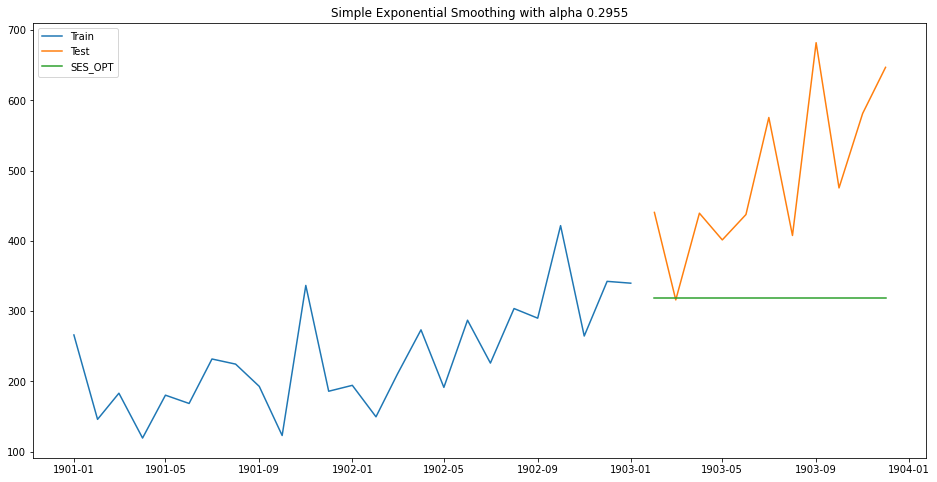

In [49]:
y_hat_avg['SES']     = model_fit.forecast(len(test['Sales']))

alpha_value          = np.round(model_fit.params['smoothing_level'], 4)


plt.figure(figsize=(16,8))
plt.plot(train.index, train['Sales'], label = 'Train')
plt.plot(test.index, test['Sales'],   label = 'Test')
plt.plot(test.index, y_hat_avg.SES,   label = 'SES_OPT')
plt.title('Simple Exponential Smoothing with alpha ' + str(alpha_value))
plt.legend(loc='best') 
plt.show()

In [50]:
rmse_opt             =  np.sqrt(mean_squared_error(test['Sales'], y_hat_avg.SES))
mape_opt             =  MAPE(test['Sales'], y_hat_avg.SES)

print("For alpha = %1.2f,  RMSE is %3.4f MAPE is %3.2f" %(alpha_value, rmse_opt, mape_opt))

For alpha = 0.30,  RMSE is 203.7065 MAPE is 35.18


In [51]:
tempResultsDf = pd.DataFrame({'Method': 'SES', 'rmse': [rmse_opt], 'mape' : [mape_opt]})
resultsDf = pd.concat([resultsDf, tempResultsDf])

In [52]:
print(resultsDf)

                     Method        rmse   mape
0          RegressionOnTime  164.563000  27.94
0  RegressionOnTimeSeasonal  185.864000  32.59
0               Naive model  186.469000  31.72
0            Simple Average  279.196000  52.35
0     moving_avg_forecast_4   75.514000  13.05
0     moving_avg_forecast_6   88.576000  14.62
0     moving_avg_forecast_8  105.158000  17.03
0    moving_avg_forecast_12  134.071000  22.79
0                       SES  203.706458  35.18


### Method 7: Holt's Linear Trend Method (Double Exponential Smoothing)

In [53]:
import statsmodels.api as sm

In [54]:
y_hat_avg = test.copy()

In [55]:
model_fit = Holt(np.asarray(train['Sales'])).fit()

D:\Anaconda\lib\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


In [56]:
y_hat_avg['Holt_linear'] = model_fit.forecast(len(test))

In [57]:
print('')
print('==Holt model Exponential Smoothing Parameters ==')
print('')
alpha_value = np.round(model_fit.params['smoothing_level'], 4)
beta_value  = np.round(model_fit.params['smoothing_slope'], 4)

print('Smoothing Level', alpha_value )
print('Smoothing Slope', beta_value)
print('Initial Level',   np.round(model_fit.params['initial_level'], 4))
print('')


==Holt model Exponential Smoothing Parameters ==

Smoothing Level 0.5263
Smoothing Slope 0.5263
Initial Level 266.0



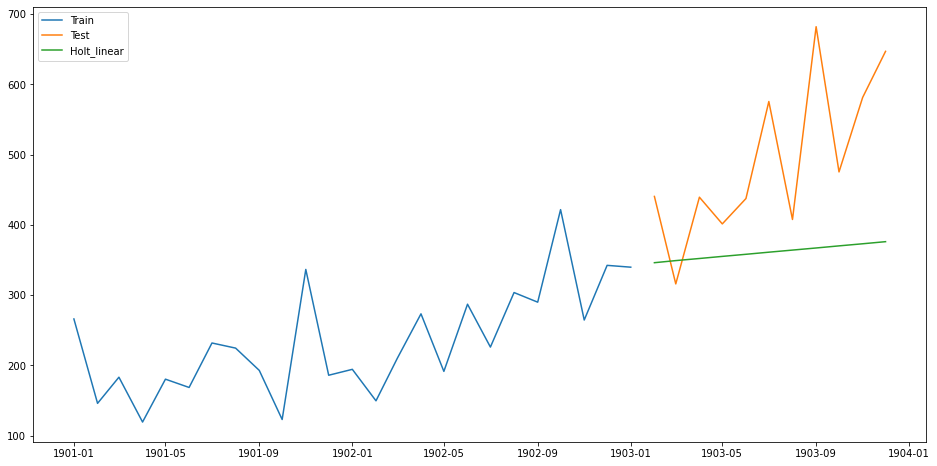

In [58]:
plt.figure(figsize=(16,8))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_avg['Holt_linear'], label='Holt_linear')
plt.legend(loc='best')
plt.show()

In [59]:
rmse_opt             =  np.sqrt(mean_squared_error(test['Sales'], y_hat_avg['Holt_linear']))
mape_opt             =  MAPE(test['Sales'], y_hat_avg['Holt_linear'])

print("For alpha = %1.2f,  RMSE is %3.4f MAPE is %3.2f" %(alpha_value, rmse_opt, mape_opt))

For alpha = 0.53,  RMSE is 165.4147 MAPE is 27.72


In [60]:
tempResultsDf = pd.DataFrame({'Method': 'Holt_linear', 'rmse': [rmse_opt], 'mape' : [mape_opt]})
resultsDf = pd.concat([resultsDf, tempResultsDf])

In [61]:
print(resultsDf)

                     Method        rmse   mape
0          RegressionOnTime  164.563000  27.94
0  RegressionOnTimeSeasonal  185.864000  32.59
0               Naive model  186.469000  31.72
0            Simple Average  279.196000  52.35
0     moving_avg_forecast_4   75.514000  13.05
0     moving_avg_forecast_6   88.576000  14.62
0     moving_avg_forecast_8  105.158000  17.03
0    moving_avg_forecast_12  134.071000  22.79
0                       SES  203.706458  35.18
0               Holt_linear  165.414714  27.72


### Inference

The model is slightly better than SES model but worse than all moving average models.

# The following Triple Exponential Smoothing Models are built to compare with the models that have been built so far.

### Method 8: Holt-Winters Method - Additive seasonality - Build this model and compare with the other models.

In [62]:
y_hat_avg = test.copy()

In [63]:
model_fit = ExponentialSmoothing(np.asarray(train['Sales']) ,seasonal_periods = 12 ,trend='add', seasonal='add').fit()

D:\Anaconda\lib\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


In [64]:
y_hat_avg['Holt_Winter'] = model_fit.forecast(len(test))

#### Plot the predicted Time Series Graph on the Test Data and compare the RMSE and the MAPE to the data frame to compare the model evaluation parameters.

In [65]:
print('')
print('== Holt-Winters Additive ETS(A,A,A) Parameters ==')
print('')
alpha_value = np.round(model_fit.params['smoothing_level'], 4)
beta_value  = np.round(model_fit.params['smoothing_slope'], 4)
gamma_value = np.round(model_fit.params['smoothing_seasonal'], 4) 

print('Smoothing Level: ', alpha_value)
print('Smoothing Slope: ', beta_value)
print('Smoothing Seasonal: ', gamma_value)
print('Initial Level: ', np.round(model_fit.params['initial_level'], 4))
print('Initial Slope: ', np.round(model_fit.params['initial_slope'], 4))
print('Initial Seasons: ', np.round(model_fit.params['initial_seasons'], 4))
print('')


== Holt-Winters Additive ETS(A,A,A) Parameters ==

Smoothing Level:  0.0
Smoothing Slope:  0.0
Smoothing Seasonal:  0.0
Initial Level:  235.1183
Initial Slope:  5.4845
Initial Seasons:  [ -33.1238 -130.4793  -89.7683 -123.9831 -101.3387  -88.503   -58.8648
  -47.1477  -76.6412  -98.152    19.7781  -75.6805]



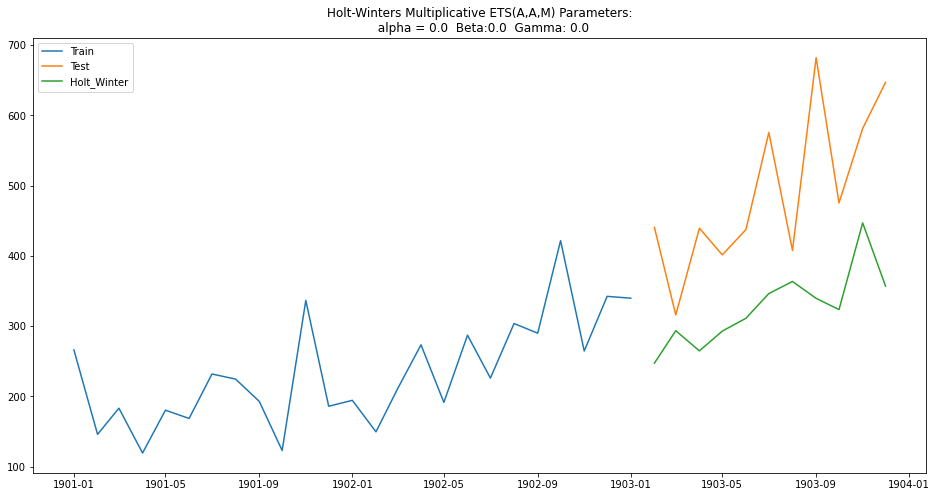

In [66]:
plt.figure(figsize=(16,8))
plt.plot( train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.title('Holt-Winters Multiplicative ETS(A,A,M) Parameters:\n  alpha = ' + 
          str(alpha_value) + '  Beta:' + 
          str(beta_value) +
          '  Gamma: ' + str(gamma_value))
plt.legend(loc='best')

In [67]:
rmse_opt             =  np.sqrt(mean_squared_error(test['Sales'], y_hat_avg['Holt_Winter']))
mape_opt             =  MAPE(test['Sales'], y_hat_avg['Holt_Winter'])

print("For alpha = %1.2f, beta = %1.2f, gamma = %1.2f, RMSE is %3.4f MAPE is %3.2f" %(alpha_value, beta_value, gamma_value, rmse_opt, mape_opt))

For alpha = 0.00, beta = 0.00, gamma = 0.00, RMSE is 189.0341 MAPE is 33.63


In [68]:
tempResultsDf = pd.DataFrame({'Method': 'Holt_Winter', 'rmse': [rmse_opt], 'mape' : [mape_opt]})
resultsDf = pd.concat([resultsDf, tempResultsDf])

In [69]:
print(resultsDf)

                     Method        rmse   mape
0          RegressionOnTime  164.563000  27.94
0  RegressionOnTimeSeasonal  185.864000  32.59
0               Naive model  186.469000  31.72
0            Simple Average  279.196000  52.35
0     moving_avg_forecast_4   75.514000  13.05
0     moving_avg_forecast_6   88.576000  14.62
0     moving_avg_forecast_8  105.158000  17.03
0    moving_avg_forecast_12  134.071000  22.79
0                       SES  203.706458  35.18
0               Holt_linear  165.414714  27.72
0               Holt_Winter  189.034061  33.63


### Method 9: Holt-Winters Method - Multiplicative Model - Build this model and compare with the other models.

In [70]:
y_hat_avg = test.copy()

In [71]:
model_fit = ExponentialSmoothing(np.asarray(train['Sales']) ,seasonal_periods = 12 ,trend='add', seasonal='Multiplicative').fit()

D:\Anaconda\lib\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


In [72]:
y_hat_avg['Holt_Winter_M'] = model_fit.forecast(len(test))

#### Plot the predicted Time Series Graph on the Test Data and compare the RMSE and the MAPE to the data frame to compare the model evaluation parameters.

In [73]:
print('')
print('== Holt-Winters Additive ETS(A,A,M) Parameters ==')
print('')
alpha_value = np.round(model_fit.params['smoothing_level'], 4)
beta_value  = np.round(model_fit.params['smoothing_slope'], 4)
gamma_value = np.round(model_fit.params['smoothing_seasonal'], 4) 

print('Smoothing Level: ', alpha_value)
print('Smoothing Slope: ', beta_value)
print('Smoothing Seasonal: ', gamma_value)
print('Initial Level: ', np.round(model_fit.params['initial_level'], 4))
print('Initial Slope: ', np.round(model_fit.params['initial_slope'], 4))
print('Initial Seasons: ', np.round(model_fit.params['initial_seasons'], 4))
print('')


== Holt-Winters Additive ETS(A,A,M) Parameters ==

Smoothing Level:  0.0526
Smoothing Slope:  0.0526
Smoothing Seasonal:  0.5789
Initial Level:  266.6667
Initial Slope:  5.5278
Initial Seasons:  [0.9975 0.5471 0.6866 0.4474 0.6761 0.6319 0.8692 0.8419 0.723  0.4609
 1.2619 0.6971]



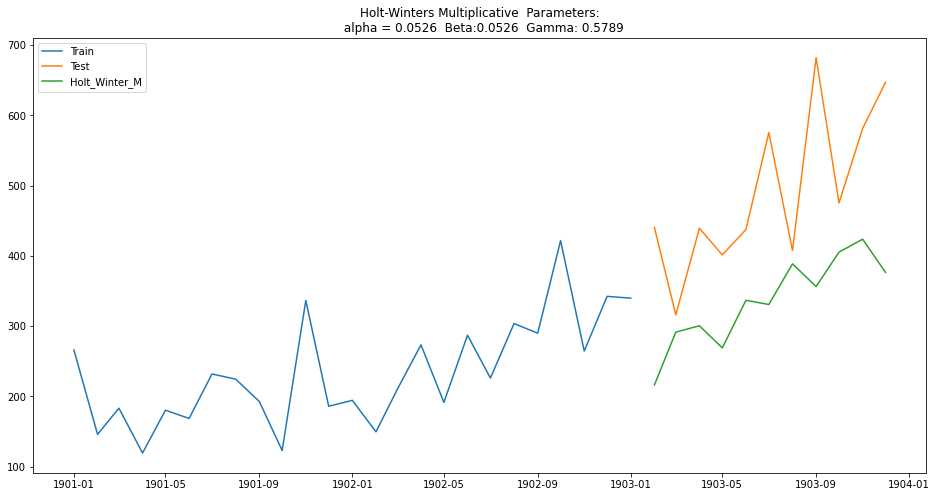

In [74]:
plt.figure(figsize=(16,8))
plt.plot( train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_avg['Holt_Winter_M'], label='Holt_Winter_M')
plt.title('Holt-Winters Multiplicative  Parameters:\n  alpha = ' + 
          str(alpha_value) + '  Beta:' + 
          str(beta_value) +
          '  Gamma: ' + str(gamma_value))
plt.legend(loc='best')

In [75]:
rmse_opt             =  np.sqrt(mean_squared_error(test['Sales'], y_hat_avg['Holt_Winter_M']))
mape_opt             =  MAPE(test['Sales'], y_hat_avg['Holt_Winter_M'])

print("For alpha = %1.2f, beta = %1.2f, gamma = %1.2f, RMSE is %3.4f MAPE is %3.2f" %(alpha_value, beta_value, gamma_value, rmse_opt, mape_opt))

For alpha = 0.05, beta = 0.05, gamma = 0.58, RMSE is 182.6908 MAPE is 31.62


In [76]:
tempResultsDf = pd.DataFrame({'Method': 'Holt_Winter M', 'rmse': [rmse_opt], 'mape' : [mape_opt]})
resultsDf = pd.concat([resultsDf, tempResultsDf])

In [77]:
print(resultsDf)

                     Method        rmse   mape
0          RegressionOnTime  164.563000  27.94
0  RegressionOnTimeSeasonal  185.864000  32.59
0               Naive model  186.469000  31.72
0            Simple Average  279.196000  52.35
0     moving_avg_forecast_4   75.514000  13.05
0     moving_avg_forecast_6   88.576000  14.62
0     moving_avg_forecast_8  105.158000  17.03
0    moving_avg_forecast_12  134.071000  22.79
0                       SES  203.706458  35.18
0               Holt_linear  165.414714  27.72
0               Holt_Winter  189.034061  33.63
0             Holt_Winter M  182.690804  31.62


### Inference

**As of now, we observe that Moving average of window width of 4 seems to be a good fit for the data.**

## END